In [8]:
# Script Name: Assignment 7 
# Purpose of script: Complete Assignment 7 for Econ 320
# Author: Gavin Mason
# Date Created: 10/23/2022
# Notes:

# Packages
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [9]:
n = 100000
x = np.random.normal(10,10**0.5,n)
u = np.random.normal(0,5**0.5,n)
y = 2.5 + (1.5*x) + u
popdata = pd.DataFrame({'y':y, 'x':x})

In [10]:
sampdata = popdata.sample(1000)
reg = smf.ols('y ~ x', data = sampdata).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     4119.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:37:37   Log-Likelihood:                -2259.2
No. Observations:                1000   AIC:                             4522.
Df Residuals:                     998   BIC:                             4532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6366      0.240     10.964      0.000       2.165       3.108
x              1.4822      0.023     64.180      0.000       1.437       1.528
==============================================================================
Omnibus:                        1.368   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.282
Skew:                           0.012   Prob(JB):                        0.527
Kurtosis:                       3.174   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
rep = 1000
b1r = []
b2r = []
for i in range(rep):
    sample = popdata.sample(1000)
    beta1, beta2 = smf.ols('y~x',data=sample).fit().params
    b1r.append(beta1)
    b2r.append(beta2)

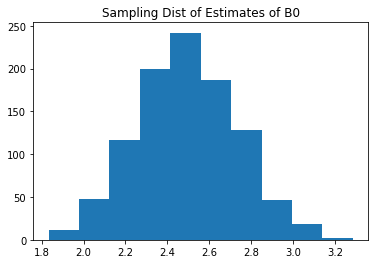

In [12]:
b1, b2 = np.array(b1r), np.array(b2r)

fig1, axes = plt.subplots(1,1)
axes.hist(b1)
plt.title('Sample Dist of Estimates of b0')
plt.show(fig1)

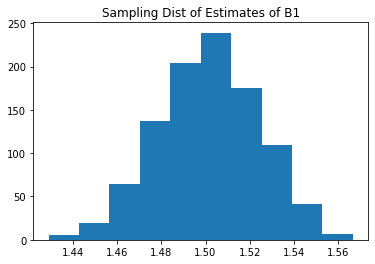

In [13]:
fig2, axes = plt.subplots(1,1)
axes.hist(b2)
plt.title('Sample Dist of Estimates of b1')
plt.show(fig2)

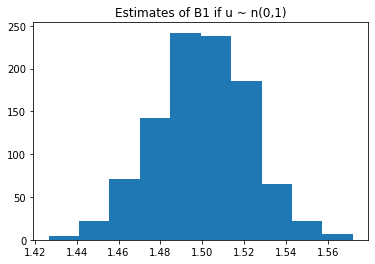

In [14]:
#u(0,1)
u = np.random.normal(0,1,n)
y = 2.5 + (1.5*x) + u
population = pd.DataFrame({'y':y, 'x':x})

rep = 1000
bb = []
for i in range(rep):
    sample = popdata.sample(rep)
    beta1, beta2 = smf.ols('y~x',data=sample).fit().params
    bb.append(beta2)
    
b = np.array(bb)
fig3, axes = plt.subplots(1,1)
axes.hist(b)
plt.title('Estimates of b1 if u ~ n(0,1)')
plt.show(fig3)

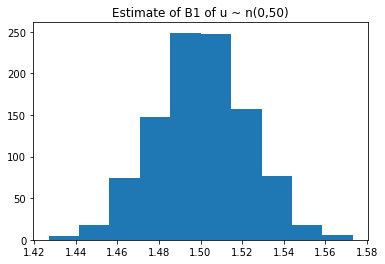

In [15]:
# u(0,50)
u = np.random.normal(0,50,n)
y = 2.5 + (1.5*x) + u
population = pd.DataFrame({'y':y, 'x':x})

rep = 1000
bb = []
for i in range(rep):
    sample = popdata.sample(rep)
    beta1, beta2 = smf.ols('y~x',data=sample).fit().params
    bb.append(beta2)
    
b = np.array(bb)
fig4, axes = plt.subplots(1,1)
axes.hist(b)
plt.title('Estimate of b1 of u ~ n(0,50)')
plt.show(fig4)